In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
# previsao-de-consumo
drive.mount('/content/drive')
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/tese/previsao-de-consumo.parquet')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                   datahora dia mes   ano        data   hora      mat  \
0 2025-03-01 00:15:00+00:00  01  03  2025  2025-03-01  00:15  78578.0   
1 2025-03-01 00:45:00+00:00  01  03  2025  2025-03-01  00:45  89071.0   
2 2025-03-01 01:15:00+00:00  01  03  2025  2025-03-01  01:15  87942.0   
3 2025-03-01 02:45:00+00:00  01  03  2025  2025-03-01  02:45  87503.0   
4 2025-03-01 03:00:00+00:00  01  03  2025  2025-03-01  03:00  85741.0   

         at        mt        bt      total  
0  205789.0  388269.0  778036.0  1450672.0  
1  207369.0  383838.0  729278.0  1409556.0  
2  207042.0  378010.0  678721.0  1351715.0  
3  202444.0  359101.0  583416.0  1232464.0  
4  201296.0  357359.0  573849.0  1218245.0  


In [3]:
df

,datahora,dia,mes,ano,data,hora,mat,at,mt,bt,total
0,2025-03-01 00:15:00+00:00,01,03,2025,2025-03-01,00:15,78578.0,205789.0,388269.0,778036.0,1450672.0
1,2025-03-01 00:45:00+00:00,01,03,2025,2025-03-01,00:45,89071.0,207369.0,383838.0,729278.0,1409556.0
2,2025-03-01 01:15:00+00:00,01,03,2025,2025-03-01,01:15,87942.0,207042.0,378010.0,678721.0,1351715.0
3,2025-03-01 02:45:00+00:00,01,03,2025,2025-03-01,02:45,87503.0,202444.0,359101.0,583416.0,1232464.0
4,2025-03-01 03:00:00+00:00,01,03,2025,2025-03-01,03:00,85741.0,201296.0,357359.0,573849.0,1218245.0
...,...,...,...,...,...,...,...,...,...,...,...
29371,2025-09-25 05:45:00+01:00,25,09,2025,2025-09-25,05:45,67151.0,212454.0,406676.0,497428.0,1183709.0
29372,2025-09-25 06:00:00+01:00,25,09,2025,2025-09-25,06:00,69704.0,213183.0,414885.0,504234.0,1202006.0
29373,2025-09-25 06:30:00+01:00,25,09,2025,2025-09-25,06:30,50416.0,216467.0,457005.0,535313.0,1259201.0
29374,2025-09-25 06:45:00+01:00,25,09,2025,2025-09-25,06:45,50775.0,221060.0,468588.0,553454.0,1293877.0


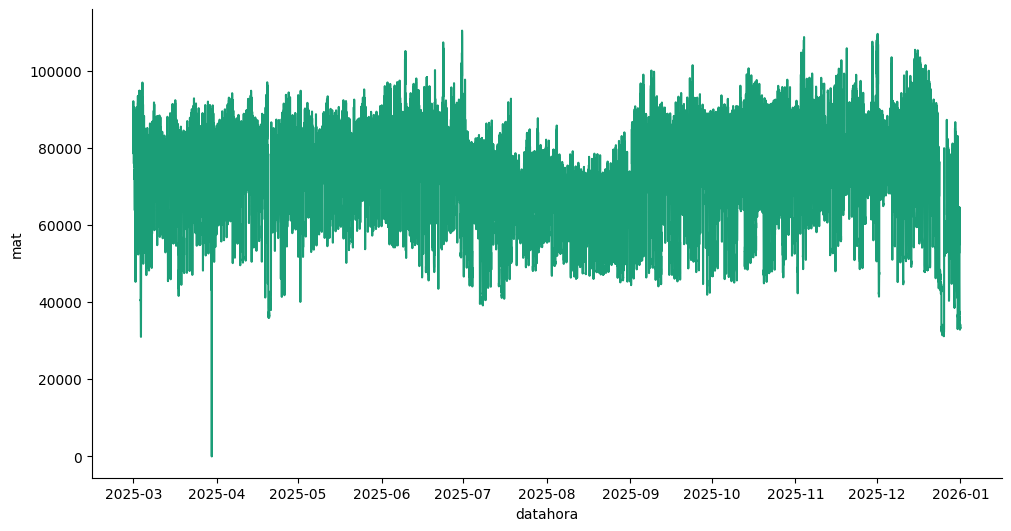

In [4]:
# @title datahora vs mat

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datahora']
  ys = series['mat']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datahora', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datahora')
_ = plt.ylabel('mat')